In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from hyperopt import hp,fmin,tpe,STATUS_OK,Trials
from sklearn.metrics import mean_squared_error,mean_absolute_error
%matplotlib inline

In [7]:
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [8]:
df.shape

(301, 9)

In [9]:
df.dtypes[df.dtypes == object]

Car_Name        object
Fuel_Type       object
Seller_Type     object
Transmission    object
dtype: object

In [10]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 16.5+ KB


In [12]:
for col in df.dtypes[df.dtypes == object].index:
    print('Unique items in column',col,'are:',df[col].unique())
    print('-'*75)

Unique items in column Car_Name are: ['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'B

In [13]:
for col in df[['Fuel_Type','Seller_Type','Transmission']]:
    print(df[col].value_counts())
    print('-'*75)

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
---------------------------------------------------------------------------
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
---------------------------------------------------------------------------
Manual       261
Automatic     40
Name: Transmission, dtype: int64
---------------------------------------------------------------------------


In [14]:
df['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [15]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [16]:
df.drop(['Car_Name'],axis = 1,inplace = True)

In [17]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [18]:
df['Current_Year'] = 2021


In [19]:
df['Number_Of_Years'] = df['Current_Year'] - df['Year']
print(df['Number_Of_Years'])

0       7
1       8
2       4
3      10
4       7
       ..
296     5
297     6
298    12
299     4
300     5
Name: Number_Of_Years, Length: 301, dtype: int64


In [20]:
df.drop(['Year','Current_Year'],axis = 1,inplace = True)

In [21]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_Of_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [22]:
df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [23]:
def Encode(df,variable):
    encoded_Variable = df[variable].value_counts().to_dict()
    df[variable] = df[variable].map(encoded_Variable)

In [24]:
for col in df[['Fuel_Type','Seller_Type','Transmission']]:
    Encode(df,col)

In [25]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_Of_Years
0,3.35,5.59,27000,239,195,261,0,7
1,4.75,9.54,43000,60,195,261,0,8
2,7.25,9.85,6900,239,195,261,0,4
3,2.85,4.15,5200,239,195,261,0,10
4,4.60,6.87,42450,60,195,261,0,7


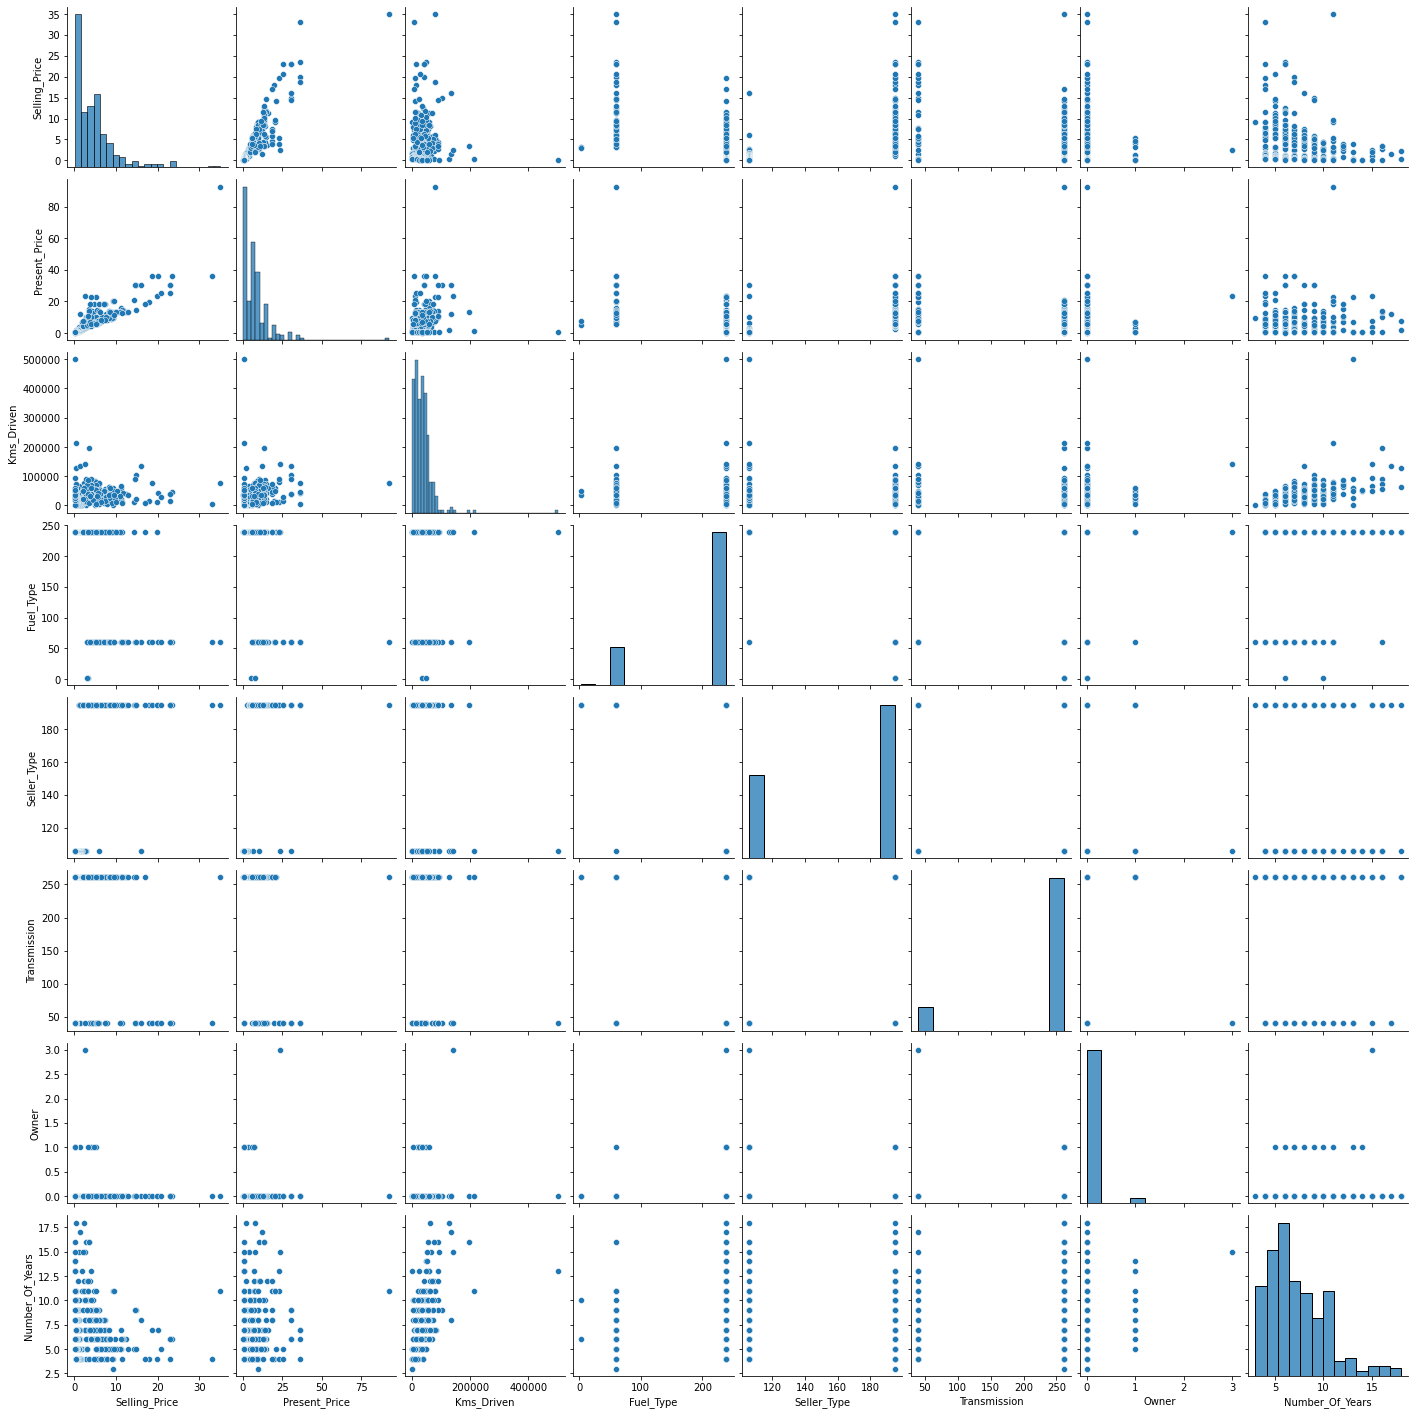

In [27]:
sns.pairplot(df)

In [28]:
df_corr = df.corr()
index = df_corr.index

<AxesSubplot:>

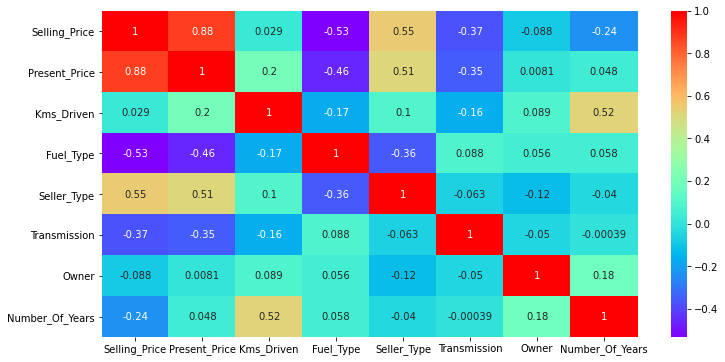

In [30]:
plt.figure(figsize = (12,6))
sns.heatmap(df[index].corr(),annot = True,cmap = 'rainbow')

In [31]:
X = df.drop(['Selling_Price'],axis = 1)
y = df['Selling_Price']

In [32]:
X.head()

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_Of_Years
0,5.59,27000,239,195,261,0,7
1,9.54,43000,60,195,261,0,8
2,9.85,6900,239,195,261,0,4
3,4.15,5200,239,195,261,0,10
4,6.87,42450,60,195,261,0,7


In [33]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [34]:
threshold = .52

def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr

correlation(X,threshold)

{'Number_Of_Years'}

In [35]:
model=ExtraTreesRegressor(random_state = 101)
model.fit(X,y)

ExtraTreesRegressor(random_state=101)

In [36]:
model.feature_importances_

array([0.39785798, 0.03835055, 0.14666205, 0.25855293, 0.08085203,
       0.00108042, 0.07664404])

<AxesSubplot:>

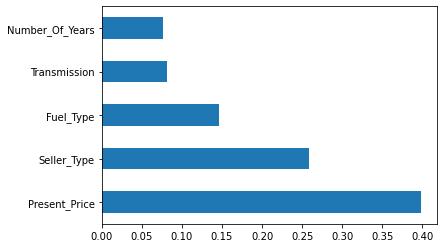

In [37]:
pd.Series(model.feature_importances_, index = X.columns).nlargest(5).plot(kind = 'barh')

In [38]:
rf = RandomForestRegressor()

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [40]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [41]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [42]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total= 5.5min
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


In [ ]:
y_pred = rf_random.predict(X_test)

In [ ]:
sns.histplot(y_test - y_pred,kde = True)

In [ ]:
plt.scatter(y_test,y_pred) 

In [1]:
param_grid = {
    'max_depth': [rf_random.best_params_['max_depth']],
    'max_features': [rf_random.best_params_['max_features']],
    'min_samples_leaf': [rf_random.best_params_['min_samples_leaf'], 
                         rf_random.best_params_['min_samples_leaf']+2],
    'min_samples_split': [rf_random.best_params_['min_samples_split'] - 2,
                          rf_random.best_params_['min_samples_split'] - 1,
                          rf_random.best_params_['min_samples_split'], 
                          rf_random.best_params_['min_samples_split'] +1,
                          rf_random.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_random.best_params_['n_estimators'] - 100, 
                     rf_random.best_params_['n_estimators'], 
                     rf_random.best_params_['n_estimators'] + 100]
}

print(param_grid)

NameError: name 'rf_random' is not defined

In [ ]:
rf=RandomForestRegressor()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=3,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

In [ ]:
grid_search

In [ ]:
y_pred=grid_search.predict(X_test)
sns.histplot(y_test - y_pred, kde = True)

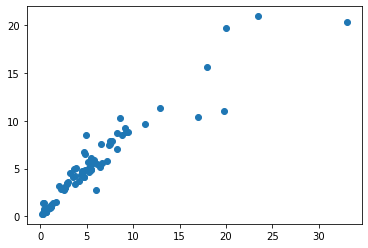

In [46]:
plt.scatter(y_test, y_pred)

In [48]:
params = {'max_depth': hp.quniform('max_depth', 10, 1200, 10),
        'max_features': hp.choice('max_features', ['auto', 'sqrt','log2', None]),
        'min_samples_leaf': hp.uniform('min_samples_leaf', 0, 0.5),
        'min_samples_split' : hp.uniform ('min_samples_split', 0, 1),
        'n_estimators' : hp.choice('n_estimators', [10, 50, 300, 750, 1200])
    }

In [49]:
params

{'max_depth': <hyperopt.pyll.base.Apply at 0xd9bc778>,
 'max_features': <hyperopt.pyll.base.Apply at 0xd9bc5e0>,
 'min_samples_leaf': <hyperopt.pyll.base.Apply at 0xd9bcce8>,
 'min_samples_split': <hyperopt.pyll.base.Apply at 0xd9bcd78>,
 'n_estimators': <hyperopt.pyll.base.Apply at 0xd9bce08>}

In [ ]:
seed=2
def objective(params):
    est = int(params['n_estimators'])
    md = int(params['max_depth'])
    msl = int(params['min_samples_leaf'])
    mss = int(params['min_samples_split'])
    model = RandomForestRegressor(n_estimators=est,max_depth=md,min_samples_leaf=msl,min_samples_split=mss)
    model.fit(X_train,y_train)
    y_pred_hyperopt = model.predict(X_test)
    score = mean_squared_error(y_test,y_pred_hyperopt)
    return score

def optimize(trial):
    params={'n_estimators':hp.uniform('n_estimators',100,500),
           'max_depth':hp.uniform('max_depth',5,20),
           'min_samples_leaf':hp.uniform('min_samples_leaf',1,5),
           'min_samples_split':hp.uniform('min_samples_split',2,6)}
    best=fmin(fn=objective,space=params,algo=tpe.suggest,trials=trial,max_evals=100,rstate=np.random.RandomState(seed))
    return best

trial=Trials()
best=optimize(trial)


 68%|███████████████████████████████▉               | 68/100 [01:00<00:31,  1.03trial/s, best loss: 2.4967927020565237]

In [ ]:
best

In [ ]:
for t in trial.trials[:2]:
    print (t)

In [ ]:
TID = [t['tid'] for t in trial.trials]
Loss = [t['result']['loss'] for t in trial.trials]
maxd = [t['misc']['vals']['max_depth'][0] for t in trial.trials]
nest = [t['misc']['vals']['n_estimators'][0] for t in trial.trials]
min_ss = [t['misc']['vals']['min_samples_split'][0] for t in trial.trials]
min_sl = [t['misc']['vals']['min_samples_leaf'][0] for t in trial.trials]

hyperopt_rfr = pd.DataFrame({'tid':TID,'loss':Loss,
                          'max_depth':maxd,'n_estimators':nest,
                          'min_samples_split':min_ss, 'min_samples_leaf':min_sl})

In [ ]:
hyperopt_rfr.head()

In [ ]:
trainedforest = RandomForestRegressor(max_depth = best['max_depth'],  
                                       min_samples_leaf = round(best['min_samples_leaf']), 
                                       min_samples_split = round(best['min_samples_split']), 
                                       n_estimators = int(best['n_estimators'])).fit(X_train,y_train)

In [ ]:
y_pred_hyperopt = trainedforest.predict(X_test)

In [ ]:
sns.histplot(y_test - y_pred_hyperopt,kde = True)

In [ ]:
plt.scatter(y_test,y_pred_hyperopt)

In [ ]:
print('MAE is:',mean_absolute_error(y_test,y_pred_hyperopt))
print('MSE is:',mean_squared_error(y_test,y_pred_hyperopt))
print('RMSE is:',np.sqrt(mean_squared_error(y_test,y_pred_hyperopt)))

In [ ]:
import pickle
file = open('regression_rf.pkl','wb')
pickle.dump(trainedforest,file)